# ДЗ №3. Калибровка ELISA-теста

В данном задании вы будете разрабатывать калибровку для [ELISA-теста](https://ru.wikipedia.org/wiki/Иммуноферментный_анализ), определяющего наличие особо опасного штамма вируса гриппа.

Выполнять на ядре версии `3.7`.

## Требования к сдаче задания

1. Дедлайн **15 мая в 23:59 по МСК**. После дедлайна работы не принимаются, кроме случаев наличия уважительной причины.
2. Сдача будет организована через google-форму.
3. У каждого студента есть свой **трёхзначный** уникальный номер (далее &mdash; `<ID>`).
4. В форму нужно загрузить заполненный ноутбук под именем `HW3_<ID>.ipynb`. Например, если ваш номер `023`, то вы должны переименовать его из `HW3_ELISA.ipynb` в `HW3_023.ipynb` и загрузить. Архивировать его не нужно, дополнительные файлы также загружать не надо.
5. Весь код в данном ноутбуке должен запускаться.

## Теория

Вирусы гриппа вызывают ряд острых респираторных заболеваний и являются причинами переодических эпидемий и пандемий.

Некоторые из них наш организм переносит без особых осложнений, другие могут быть особенно [смертоносными](https://ru.wikipedia.org/wiki/Испанский_грипп).

Вирусы гриппа подразделяются на несколько родов (`A`, `B`, `C` и `D`), представитель каждого из которых в дополнение к этому характеризуется определённым `серотипом`. Давайте разберёмся, что же это такое.

Упрощённо вирус гриппа можно представить следующей схемой.



Как можно видеть, вирион гриппа состоит из внутренней полости, содержащей генетический материал, и оболочки. Оболочка, в свою очередь, построена из множества копий молекул 2-х типов &mdash; белков: [гемагглютинина](https://ru.wikipedia.org/wiki/Гемагглютинин) и [нейраминидазы](https://ru.wikipedia.org/wiki/Нейраминидаза).

При заражении вирусной инфекцией иммунная система начинает искать способы борьбы с ней. Сущетсвуют две принципиально разные ситуации:
- Когда вирус проник и размножается в клетке хозяина,
- Когда вирион свободно путешествует по организму, ища возможность проникнуть в клетку для размножения.

В первом случае иммунная система обычно стремится найти и уничтожить уже заражённые клетки. Во втором &mdash; нейтрализовать вирионы. Эти, в принципе, похожие задачи решаются двумя различными типами иммунитета. Для выполнения этого задания крайне полезно представлять, как работает последний тип, ответственный за уничтожение вирионов.

### Гуморальный иммунитет

Процесс нейтрализации вирионов подчиняется следующему алгоритму:
- Организм учится определять отличительные характеристики, присущие вирионам данного конкретного типа вируса.

Это достигается посредством хитрого механизма, называемого [V(D)J-рекомбинацией](https://ru.wikipedia.org/wiki/V(D)J-рекомбинация). Для нас главное, что по его завершению иммунитет умеет производить специальные молекулы, специфично прилипающие к вирусным частицам. Эти молекулы называются [антителами](https://ru.wikipedia.org/wiki/Антитела). Антитела &mdash; это белки, имеющие склонность притягиваться к вирионам данного конкретного типа вируса посредством Ван-дер-Ваальсова взаимодействия.

Как только аминокислотная последовательность подходящего антитела подобрана, происходит следующее.
- Организм клонирует специальные клетки, производящие этот конкретный вариант антител.
- Иммунная система доставляет антитела в место заражения.
- Специальные клетки начинают уничтожение всего, к чему заякорились эти антитела.

На всякий случай, организм запоминает последовательность подобранного антитела, так что повторное заражение тем же или похожим вирусом вызовет немедленную или намного более скорую реализацию последних трёх шагов. Это и называется `приобритённым иммунитетом`.

Тем не менее вирусы постоянно ищут способы обойти приобретённые защитные механизмы и эволюционируют в сторону изменения молекулярной структуры своих компонентов так, чтобы антитела перестали их узнавать.

### Серотип

Соверешенно очевидно, что антитела обычно подбираются под белки, составляющие оболочку вирионов. И как уже упоминалось, в контексте вируса гриппа таких белков 2: гемагглютинин (**H**) и нейраминидаза (**N**).

Все вы, наверное, слышали о штаммах, именуемых **H1N1** или **H2N3**. Так вот, эти цифры обозначают конкретный вариант гемагглютинина и нейраминидазы соответсвенно, из которых состоит оболочка вирионов. Уникальное сочетание вариантов **H** и **N** и назывется `серотипом`. Как можно догадаться, если организм уже научился бороться с вирусом определённого серотипа, то дальнейшие его встречи с тем же серотипом не должны составлять для него проблем.

На самом деле, всё ещё сложнее, и например, белки оболочки вирионов испанского гриппа 1918 года (который был **H1N1**) могут настолько сильно отличаться от белков оболочки более современных вариантов штамма с тем же серотипом, что антитела для определения одного могут совершенно не подходить для другого.

## Постановка задачи

Как бы то ни было, представьте, что в одной далёкой стране зафиксирована вспышка вируса гриппа неизвестного серотипа. И наша задача заключается в том, чтобы:
1. Определить его серотип.
2. Откалибровать оборудование, предназначенное для идентификации присутствия этого вируса в пробе.

У нас есть:
1. Антитела, специфичные к белкам **H1**, **H2**, **H3**, **H4**, **H5** и **N1**, **N2**, **N3**, **N4**, **N5**, **N6**, **N7**.
2. Пробы, полученные от 327 здоровых и 48 заражённых этим штаммом пациентов.
3. Результаты ELISA-теста реакций каждого антитела с каждой пробой.

Что же такое ELISA-тест? По сути, это набор методов для измерения интенсивности реакций между веществами в растворе с крайне малой концентрацией.

Числа, получаемые в ELISA-тесте, пропорциональны интенсивности реакции. Например, если реакция сопровождается измнением pH, то удобно использовать сверхчувствительный pH-метр на полупроводниковых электодах. А саму измеренную величину и направление изменения рассматривать в качестве интенсивности реакции.

В случае нашей задачи просто считайте, что при реакции антитела с вирусными частицами происходит изменение позрачности раствора, регистрируемое сверхчувствительной аппаратурой. А числа в таблице просто показывают величину и направление изменения прозрачности.

Также считайте, что реакции проведены в одинаковых условиях при одинаковом титре вирусных частиц (для проб заражённых пациентов) и одинаковой концентрации антител.

### Загрузка данных

Вам будет предоставлено 2 таблицы, содержащие:
- Номер пациента и его статус (болен / не болен)
- Результаты попарных ELISA-тестов между пробами пациентов и антителами

Для работы с ними будет необходимо воспользоваться библиотекой `Pandas`, поэтому изучите соответсвующий ноутбук.

А пока загрузим данные с сервера.

In [1]:
from os import mkdir
from os.path import isfile, join as join_path
from functools import partial
from warnings import filterwarnings
from urllib3 import PoolManager

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb


DATA_DIR = 'homework3_data/'
try:
    mkdir(DATA_DIR)
except FileExistsError:
    pass

to_data_dir = partial(join_path, DATA_DIR)

%matplotlib inline

In [2]:
with PoolManager() as pool:

    file = to_data_dir('ELISA_data.tsv')
    if not isfile(file):
        response = pool.request(
            'GET', 'https://mipt-stats.gitlab.io/files/mathstats_fbmf_20/sem2/homework_data/ELISA_data.tsv'
        )
        with open(file, 'wb') as out:
            out.write(response.data)

    file = to_data_dir('patient_status.csv')
    if not isfile(file):
        response = pool.request(
            'GET', 'https://mipt-stats.gitlab.io/files/mathstats_fbmf_20/sem2/homework_data/patient_status.csv'
        )
        with open(file, 'wb') as out:
            out.write(response.data)

if 'response' in locals():
    del response

Итак, мы загрузили файлы в папку `homework_data`.

Для лучшего понимания происходящего откройте загруженные файлы `homework_data/patient_status.csv` и `homework_data/ELISA_data.tsv` в любом текстовом редакторе и изучите их структуру.

А теперь считаем загруженные таблицы

In [3]:
data = pd.read_csv(to_data_dir('ELISA_data.tsv'), index_col=0, sep='\t')
data.head()

,H1 Ab,H2 Ab,H3 Ab,H4 Ab,H5 Ab,N1 Ab,N2 Ab,N3 Ab,N4 Ab,N5 Ab,N6 Ab,N7 Ab
Patient ID,,,,,,,,,,,,
1,0.066049,0.074286,-0.039821,-0.249188,0.291652,0.510564,-0.244375,-0.036992,0.173058,-0.403492,-0.041307,-0.426493
2,0.098490,-0.178538,0.017103,0.341539,-0.698644,-0.390338,0.508720,-0.162154,-0.032715,-0.054000,0.002279,-0.010394
3,-0.474249,0.091625,0.216592,0.195607,-0.139410,-0.117825,0.525555,-0.128185,-0.529284,0.095633,0.003007,-0.043820
4,-0.644830,0.287989,0.346168,-0.335711,-0.695897,-0.061603,-0.196644,-0.046465,0.313944,-0.129755,-0.193516,-0.506008
5,8.957671,15.886976,7.726296,10.616289,0.496448,1.287699,2.039855,0.885835,51.370565,0.681102,4.014436,38.722134


`Ab` в названиях колонок означает `antibody`.

Посмотрим на первую колонку

In [4]:
data['H1 Ab']

Patient ID
1      0.066049
2      0.098490
3     -0.474249
4     -0.644830
5      8.957671
         ...   
371    0.179253
372    0.313943
373   -0.043575
374   -0.101144
375    0.495596
Name: H1 Ab, Length: 375, dtype: float64

Считаем данные о статусе пациентов

In [5]:
status = pd.read_csv(
    to_data_dir('patient_status.csv'),
    dtype={'Status': pd.CategoricalDtype()},
    # Категориальный тип данных экономит память и ускоряет вычисления,
    # если требуется хранить большое количество одинаковых значений.
    # В нашем случае - это строки "Healthy" и "Ill"
    index_col=0,
    squeeze=True
)
status

Patient ID
1      Healthy
2      Healthy
3      Healthy
4      Healthy
5          Ill
        ...   
371    Healthy
372    Healthy
373    Healthy
374    Healthy
375    Healthy
Name: Status, Length: 375, dtype: category
Categories (2, object): [Healthy, Ill]

Разделим датафрейм на таблицы с больными и здоровыми пациетами

In [6]:
healthy_data = data[status == 'Healthy']
healthy_data.head()

,H1 Ab,H2 Ab,H3 Ab,H4 Ab,H5 Ab,N1 Ab,N2 Ab,N3 Ab,N4 Ab,N5 Ab,N6 Ab,N7 Ab
Patient ID,,,,,,,,,,,,
1,0.066049,0.074286,-0.039821,-0.249188,0.291652,0.510564,-0.244375,-0.036992,0.173058,-0.403492,-0.041307,-0.426493
2,0.098490,-0.178538,0.017103,0.341539,-0.698644,-0.390338,0.508720,-0.162154,-0.032715,-0.054000,0.002279,-0.010394
3,-0.474249,0.091625,0.216592,0.195607,-0.139410,-0.117825,0.525555,-0.128185,-0.529284,0.095633,0.003007,-0.043820
4,-0.644830,0.287989,0.346168,-0.335711,-0.695897,-0.061603,-0.196644,-0.046465,0.313944,-0.129755,-0.193516,-0.506008
6,0.247696,-0.420219,-0.204412,0.268801,-0.511800,0.713988,-0.299587,-0.785318,-0.046047,0.411989,0.110813,0.202686


In [7]:
ill_data = data[status == 'Ill']
ill_data.head()

,H1 Ab,H2 Ab,H3 Ab,H4 Ab,H5 Ab,N1 Ab,N2 Ab,N3 Ab,N4 Ab,N5 Ab,N6 Ab,N7 Ab
Patient ID,,,,,,,,,,,,
5,8.957671,15.886976,7.726296,10.616289,0.496448,1.287699,2.039855,0.885835,51.370565,0.681102,4.014436,38.722134
19,9.710109,16.806827,5.198338,12.126219,0.979636,1.817516,2.961309,1.222886,49.248764,1.352352,4.325853,37.376435
23,12.456714,17.195016,2.755717,14.112787,0.407444,1.227590,2.696793,1.033356,48.188234,0.936677,5.523593,26.130011
24,11.573108,17.095771,6.199116,10.455709,0.714756,2.064789,2.167685,0.764906,47.147508,-0.046819,3.513763,31.932051
41,10.106926,17.174426,7.372427,5.681035,0.410741,1.022928,2.702904,0.738997,47.624077,1.061151,5.008308,36.520607


Давайте взглянем на интенсивность реакции антител с пробами здоровых пациентов.

Построим т.н. `violin plot` для каждого антитела. Для этого воспользуемся инструментарием библиотеки `Seaborn`.

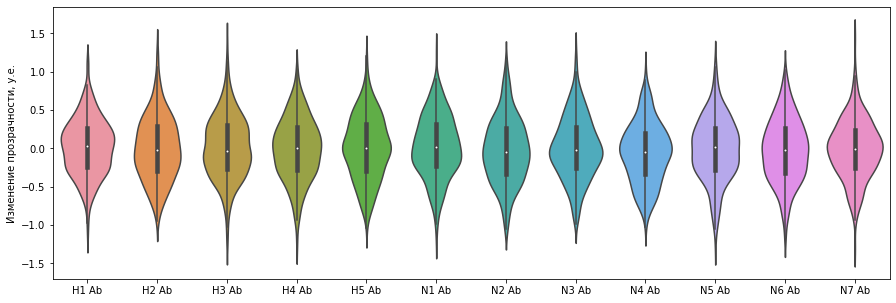

In [8]:
plt.figure(figsize=(15, 5))
plt.ylabel('Изменение прозрачности, у.е.')

sb.violinplot(
    data=healthy_data
)
plt.show()

Казалось бы, если реакции нет, то и изменение прозрачности должно строго равняться нулю.

Как видим, это не так. Подобный результат обусловлен как неточностью измерения, так и невозможностью поддерживать сторого одинаковые условия эксперимента.

In [9]:
N_antibodies = [col for col in ill_data.columns if col[0] == 'N']
N_antibodies

['N1 Ab', 'N2 Ab', 'N3 Ab', 'N4 Ab', 'N5 Ab', 'N6 Ab', 'N7 Ab']

In [10]:
H_antibodies = [col for col in ill_data.columns if col[0] == 'H']
H_antibodies

['H1 Ab', 'H2 Ab', 'H3 Ab', 'H4 Ab', 'H5 Ab']

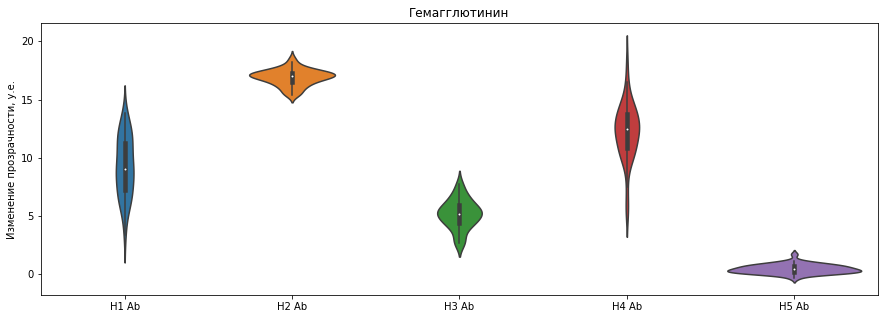

In [11]:
plt.figure(figsize=(15, 5))
plt.ylabel('Изменение прозрачности, у.е.')
plt.title('Гемагглютинин')

sb.violinplot(
    data=ill_data[H_antibodies]
)
plt.show()

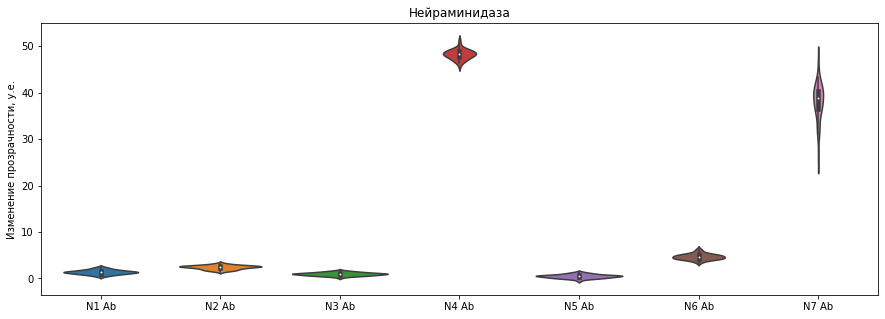

In [12]:
plt.figure(figsize=(15, 5))
plt.ylabel('Изменение прозрачности, у.е.')
plt.title('Нейраминидаза')

sb.violinplot(
    data=ill_data[N_antibodies]
)
plt.show()

Серотип: **H2N4**

Средние изменения прозрачности при анализе проб как с использованием **H2 Ab**, так и c **N4 Ab** максимальны среди антител к белкам своего класса.

Дисперсия изменения прозрачности для данных типов антител довольна мала, что свидетельствует о стабильной воспроизводимости результатов от пациента к пациенту.

Вышеприведённые факты свидетельствуют о том, что оболочка исследуемого вируса составлена из белков **H2** и **N4**.

Поскольку ошибка, вносимая прибором, по условию не зависит ни от номера здорового пациента,
ни от вида тестируемого антитела, случайные величины, представленные графиками,
показанными на самой первой картинке, независимы и распределены одинаково.

Проще говоря, это означает, что violin-графики для каждого вида антитела можно сложить и считать параметры
ошибки `mu_err` и `disp_err` по совокупности всех чисел из `healthy_data`.

В итоге получается такое распределение

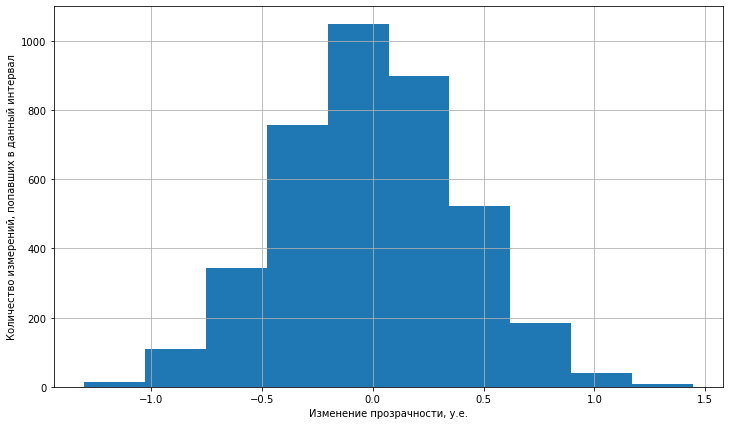

In [13]:
plt.figure(figsize=(12, 7))
plt.xlabel('Изменение прозрачности, у.е.')
plt.ylabel('Количество измерений, попавших в данный интервал')

plt.hist(healthy_data.values.flat)
plt.grid()
plt.show()

Посчитаем выборочное среднее и стандартное отклонение

In [14]:
healthy_data.values.mean()

-0.005048637097965083

In [15]:
healthy_data.values.std()

0.39961565189701576

Вспоминаем, что выборочное среднее и квадрат стандартного отклонения несмещённо оценивают матожидание и дисперсию.

Не забываем, что для несмещённости в знаменателе стандартного отклонения должно стоять `N-1`.

In [16]:
mu_err = healthy_data.values.mean()
disp_err = healthy_data.values.std(ddof=1) ** 2

Для калибровки $\mu_{H}$, $\sigma_{H}^2$, $\mu_{N}$, $\sigma_{N}^2$ выделим данные по реакции проб больных пациентов с антителами к белкам серотипа: **H2** и **N4**.

Также учтём, что наблюдаемые значения складываются из ошибки эксперимента и реального изменения прозрачности. По условию, первое не зависит от второго и эти две величины распределены нормально, а значит из $Norm(\mu_{H_0}$, $\sigma_{H_0}^2)\sim Norm(\mu_{err}$, $\sigma_{err}^2)+Norm(\mu_{H}$, $\sigma_{H}^2)$ следует $\mu_{H_0}=\mu_H+\mu_{err}$ и $\sigma_{H_0}^2=\sigma_{err}^2+\sigma_{H}^2$, где индекс $0$ означает наблюдаемое значение.

То же самое верно и для интенсивности реакции с нейраминидазой.

Вообще говоря, о несмещённости по определению корректно говорить только в случае оценки параметров **наблюдаемого** распределения (с индексом $0$). Поскольку если мы попробуем оценить реальные значения параметров изменения интенсивности следующим образом:

$\mu_H=\mu_{H_0}-\mu_{err}$

$\sigma_{H}^2=\sigma_{H_0}^2-\sigma_{err}^2$,

то будем оперировать оценками параметров $H_0$ и $err$, вычисленных на различных выборках. Можно, например, привести пример ситуации, при которой $\sigma_{H}^2$, посчитанная таким образом, окажется отрицательной, что не имеет смысла.

Тем не менее, если вы не заметили подвоха, ничего страшного. Просто имейте в виду подобные тонкости.

In [17]:
H2 = ill_data['H2 Ab']
H2.head()

Patient ID
5     15.886976
19    16.806827
23    17.195016
24    17.095771
41    17.174426
Name: H2 Ab, dtype: float64

In [18]:
N4 = ill_data['N4 Ab']
N4.head()

Patient ID
5     51.370565
19    49.248764
23    48.188234
24    47.147508
41    47.624077
Name: N4 Ab, dtype: float64

In [19]:
mu_H_0 = H2.mean()
disp_H_0 = H2.std(ddof=1) ** 2
# ddof=1 и так стоит по умолчанию:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.std.html

mu_N_0 = N4.mean()
disp_N_0 = N4.std(ddof=1) ** 2

mu_H = mu_H_0 - mu_err
disp_H = disp_H_0 - disp_err

mu_N = mu_N_0 - mu_err
disp_N = disp_N_0 - disp_err

In [20]:
print(
    f'mu_err   = {mu_err}\n'
    f'disp_err = {disp_err}\n'
    '\n'
    f'mu_H_0   = {mu_H_0}\n'
    f'disp_H_0 = {disp_H_0}\n'
    '\n'
    f'mu_N_0   = {mu_N_0}\n'
    f'disp_N_0 = {disp_N_0}'
)

mu_err   = -0.005048637097965083
disp_err = 0.1597333760137613

mu_H_0   = 16.917182434481216
disp_H_0 = 0.47615193717570625

mu_N_0   = 48.28273639462683
disp_N_0 = 1.130608686787254


## Задание

Пусть $X_1,\ldots,X_n\sim Norm(\mu,\sigma^2)$ &mdash; выборка из нормального распределения, где $\mu,\sigma^2$ &mdash; неизвестные константы. Построим доверительный интервал для неизвестного среднего $\mu$.

***Утверждение.***

Случайная величина

$T = \large\frac{\overline{X}-\mu}{S/\sqrt{n}}$,
имеет распределение Стьюдента с $n-1$ степенями свободы $\mathrm{T}(n-1)$, где $S$ &mdash; несмещённое выборочное стандартное отклонение.

Пусть, $t_{\alpha,n-1}$ &mdash; $\alpha$-квантили распределения Стьюдента . Тогда в силу симметрии последнего имеем: 

$\mathbb{P}\left(-t_{1-\frac{\alpha}{2},n-1}\le T\le t_{1-\frac{\alpha}{2},n-1}\right)=1-\alpha$.

После подстановки выражения для <math>T</math> и несложных алгебраических преобразований получаем:

$\mathbb{P}\left(\overline X-t_{1-\frac{\alpha}{2},n-1}\frac{S}{\sqrt{n}}\le\mu\le\overline X+t_{1-\frac{\alpha}{2},n-1}\frac{S}{\sqrt{n}}\right)=1-\alpha$.

### 1. Построение доверительных интервалов

Постройте $95\%$ доверительные интервалы для матожиданий ($\alpha=0.95$)
- распределения ошибки $err$,
- наблюдаемых значений изменения прозрачности $H_0$ и $N_0$.

Для этого вам понадобится библиотека `scipy.stats`, а именно [инструментарий](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) для работы с T-распределением.

Обратите внимание на так называемую `Percent point function`.

In [21]:
import scipy.stats as scs


def conf_interval(data):
    # sem - standart error of the mean (ddof=1 по умолчанию) -- S/sqrt(n) из формулы выше
    conf_int = scs.sem(data) * scs.t.ppf((1 + 0.95) / 2, len(data) - 1)
    
    mean = np.mean(data)
    left_bound = mean - conf_int
    right_bound = mean + conf_int

    return left_bound, right_bound


mu_err_confint, H_0_confint, N_0_confint = conf_interval(healthy_data.values.flatten()), conf_interval(H2), conf_interval(N4)

In [22]:
print(
    f'Mu Err 95% confint: {mu_err_confint}\n'
    f'Mu H_0 95% confint: {H_0_confint}\n'
    f'Mu N_0 95% confint: {N_0_confint}'
)

Mu Err 95% confint: (-0.017557431086266565, 0.007460156890336394)
Mu H_0 95% confint: (16.716816391922297, 17.117548477040135)
Mu N_0 95% confint: (47.97398601398242, 48.59148677527124)


### 2. Проверка нормальности распределений

ОК. Мы посчитали доверительные интервалы для матожиданий, учитывая то, что случайные величины распределены нормально.

А обосновано ли наше предположение? Давайте проверим!

Проверьте гипотезу о том, что распределения подчиняются нормальному закону, с помощью критерия Шапиро-Уилка для:
- распределения ошибки $err$,
- наблюдаемых значений изменения прозрачности $H_0$ и $N_0$.

Обратите внимание на функцию [`scipy.stats.shapiro`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html).

Сделайте выводы о нормальности на основе полученных `p-value`, считайте порогом для отвержения гипотезы значение в `0.05`.

In [23]:
print(
    f'Значения p-value по критерию Шапиро:\n'
    f'p-value Err: {scs.shapiro(healthy_data.values.flatten())[1]}\n'
    f'p-value H_0: {scs.shapiro(H2)[1]}\n'
    f'p-value N_0: {scs.shapiro(N4)[1]}'
)

Значения p-value по критерию Шапиро:
p-value Err: 0.7976378798484802
p-value H_0: 0.3144766688346863
p-value N_0: 0.7442538142204285


**Значения `p-value` для всех распределений больше `0.05`, значит мы можем считать гипотезу подтвержденной.**

### 3. Теоретические задачи (для отличников)

1. Пусть $X_1,\ldots,X_n$ &mdash; выборка пуассоновского распределения $Pois(\theta)$, то есть $\mathsf P(k)=\large\frac{\theta^k}{k!}\normalsize e^{-\theta}$ при $k\in\{0,1,2,\ldots\}$. 
 * Найдите асимптотически нормальную оценку $\theta$,
 * Постройте асимптотический доверительный интервал на $\theta$.


2. Дана выборка $X_1,\ldots,X_n$ из распределения Лапласа с плотностью $\mathsf P(x)=\frac{1}{2}e^{-|x-\theta|}$. Найдите асимптотический доверительный интервал для параметра $\theta$.

Решения двух задач выше сфотографировать (или набрать в $\LaTeX$), объединив фотографии в **один PDF**-файл с именем `<ID>.pdf`. Файл загрузить в соответсвующее место в google-формe.

3. В этой задаче нужно визуализировать свойство ***асимптотической нормальности***.

 Пусть, $X_1,\ldots,X_n$ &mdash; выборка из распределения $\mathrm U(0,\theta)$.

 Согласно центральной предельной теореме, оценка $\hat\theta=2\overline X$ является асимптотически нормальной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n=\sqrt n\left(2\overline X-\theta\right)$ в зависимости от размера набора. 

 Сгенерируйте множество выборок $X^1,\ldots,X^{300}$ из распределения $U[0,1]:\;X^j=(X^j_1,\ldots,X^j_{500}),1\leq j\leq300$.

 По каждой из них посчитайте оценки  $\hat\theta_{jn}=2\large\frac{X^j_1+\ldots+X^j_n}{n}$ для $1\leq n\leq500$, то есть оценку параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки.

 Для этих оценок посчитайте статистики $Z_{jn}=\sqrt n\left(\hat\theta_{jn}-\theta\right)$, где $\theta=1$.

In [24]:
X = np.random.uniform(size=(500, 300))
Z = np.array([[np.sqrt(i+1)*(2*np.mean(X[:i, j])-1) if i>0 else 2*X[0, j]-1 for i in range(500) ] for j in range(300)])

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе? - **Есть малозаметная сходимость к нулю (незаметная, наверное, из-за прозрачности)**

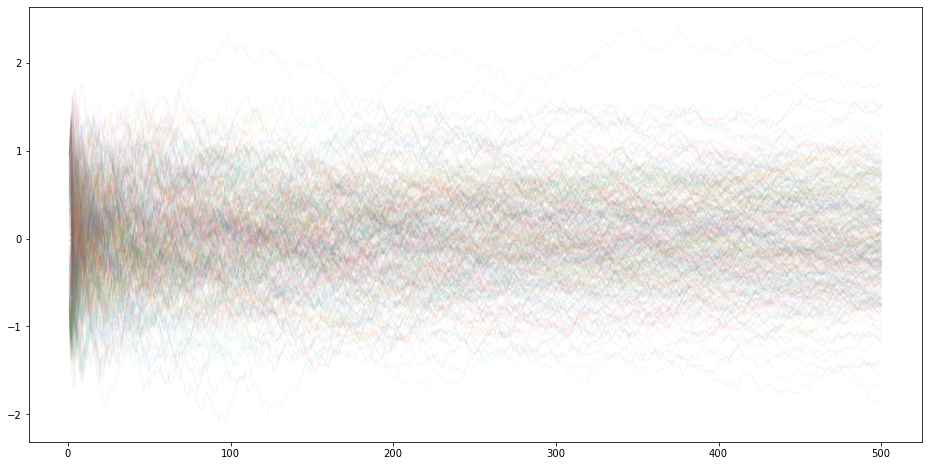

In [25]:
plt.figure(figsize=(16,8))
for j in range(300):
    plt.plot(range(1, 501), Z[j, :], alpha=0.05)

Для $n=500$ по выборке $Z_{1,500},\ldots,Z_{300,500}$ постройте гистограмму и график плотности распределения $\mathcal{N}(0, 1)$.  Не забудьте сделать легенду.

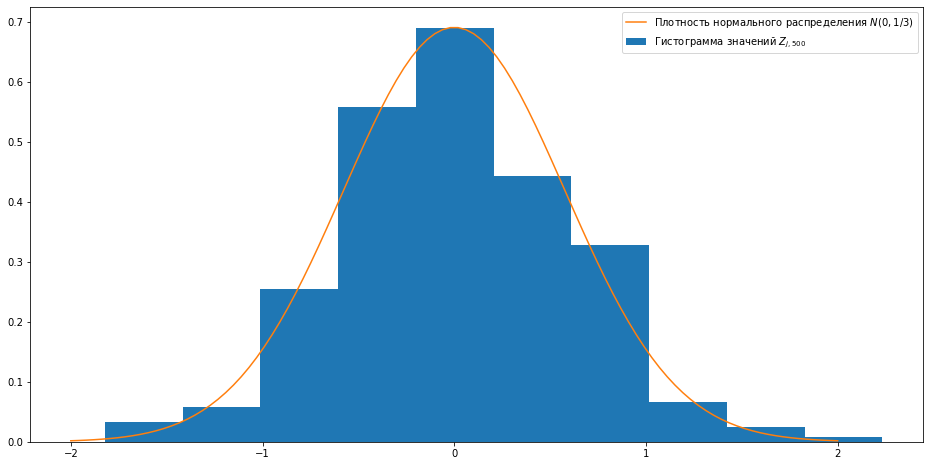

In [26]:
plt.figure(figsize=(16, 8))
plt.hist([z[499] for z in Z], density=True, label='Гистограмма значений $Z_{j,500}$')
plt.plot(np.linspace(-2, 2, 100), scs.norm.pdf(np.linspace(-2, 2, 100), scale=1/3**0.5), 
         label='Плотность нормального распределения $N(0,1/3)$')
plt.legend()
None

Сделайте вывод о смысле свойства асимптотической нормальности. Подтверждают ли сделанные эксперименты теоретические свойства?

<ВАШИ РАССУЖДЕНИЯ (для редактирования кликните по этой ячейке 2 раза)>

$X_1, \dots X_n $ -- выборка из $\mathrm U(0,\theta)$, плотность распределения $p (x) = \dfrac{1}{\theta} I_{X \in [1,\theta]}$

Матожидание:
$$MX_1 = \int^{\theta}_0 x\dfrac{1}{\theta}dx = \dfrac{\theta}{2}$$
Второй момент:
$$MX^2_1 = \int^{\theta}_0 x^2\dfrac{1}{\theta}dx = \dfrac{\theta^{2}}{3}$$
Дисперсия:
$$DX_1 = MX^2_1 - (MX_1)^2 = \dfrac{\theta^2}{12}$$
Из ЦПТ:
$$\sqrt{n}\cdot (\bar{X}-\dfrac{\theta}{2}) \xrightarrow[n \rightarrow \infty]{d} N(0, \dfrac{\theta^2}{12}),$$
что равносильно
$$\sqrt{n}\cdot (2\bar{X}-\theta) \xrightarrow[n \rightarrow \infty]{d} N(0, \dfrac{\theta^2}{3})$$

Полученная гистограмма вполне согласуется с этими рассуждениями (для $\theta = 1$).
Смысл асимптотически нормальной оценки состоит в том, что это оценка, распределение которой стремится к нормальному распределению при увеличении размера выборки.

<div style="text-align: right"><i>Подготовил <a href="https://github.com/andrewsonin">Андрей Сонин</a>